In [2]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
import string
from nltk.text import Text

/Users/sanjukarthick/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [4]:
data= pd.read_csv('Hate speech.csv')
data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [5]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
data.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [7]:
data.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [9]:
# Predictor Attribute
df = data.iloc[:, 1:]
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [10]:
# target Attribute
label = df.iloc[:, 0:1]
label.tail()

,label
31957,0
31958,0
31959,0
31960,1
31961,0


# To find missing value

In [11]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

# Data pre-processing

In [12]:
def lower_case(text):
    return text.lower()

df['tweet'] = df['tweet'].apply(lower_case)

# Remove punctuation

In [13]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punct)

In [14]:
#Remove URLS
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punct)

# Data Informantion

In [17]:

print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 31962
Number of Features: 2


# Features in data

In [18]:
df.columns

Index(['label', 'tweet'], dtype='object')

# Types of Data 

In [19]:
df.dtypes

label     int64
tweet    object
dtype: object

# Size of Data 

In [20]:
df.size

63924

# Predictor and Target value 

In [21]:
# Predictor Attribute
text = df.iloc[:, 1:]
text.tail()

,tweet
31957,ate user isz that youuuðððððð...
31958,to see nina turner on the airwaves trying to...
31959,listening to sad songs on a monday morning otw...
31960,user sikh temple vandalised in in calgary wso ...
31961,thank you user for you follow


In [22]:
# target Attribute
label = df.iloc[:, 0:1]
label.tail()

,label
31957,0
31958,0
31959,0
31960,1
31961,0


# Check the missing value 

In [23]:
df.isnull().sum()

label    0
tweet    0
dtype: int64

# Extracting the target for each class

In [24]:
# Extract the Label Feature for Each Class
hate_speech = df[df['label'] == 1].shape[0]
free_speech = df[df['label'] == 0].shape[0]
print('Hate Speech =', hate_speech)
print('Free Speech =', free_speech)

Hate Speech = 2242
Free Speech = 29720


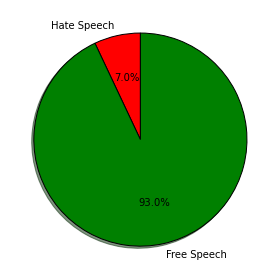

In [25]:
# Visualize the Label Class
speech = [hate_speech, free_speech]
label = ["Hate Speech", "Free Speech"]

plt.pie(speech, labels = label, shadow = True, wedgeprops = {'edgecolor': 'black'}, 
        autopct = '%1.1f%%', startangle= 90, colors=['red', 'green'])

plt.tight_layout()
plt.show()

# Feature Extraction 

# TF-IDF Model

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
# init the TF-IDF model and take 5000 most frequent words from dictionaries
vectorizer = TfidfVectorizer(max_features= 2000)

In [36]:
# remove the list inside tweet cols which was create due to tokenization
list_to_str = []
for lists in df['tweet']:
    list_to_str.append(' '.join(map(str, lists)))

df['tweet'] = list_to_str

# Split the Dataset

In [39]:
from sklearn.model_selection import train_test_split

# Splitting the dataset in to train and test

In [40]:
label = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(text, label, test_size=0.2, random_state=0)

# Train the Data 

In [42]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (25569, 1)
y_train (25569,)


# Test the data

In [43]:
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_test (6393, 1)
y_test (6393,)
